# 14장. 텐서플로의 구조 자세히 알아보기

**아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch14/ch14.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch14/ch14.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

`watermark`는 주피터 노트북에 사용하는 파이썬 패키지를 출력하기 위한 유틸리티입니다. `watermark` 패키지를 설치하려면 다음 셀의 주석을 제거한 뒤 실행하세요.

In [1]:
#!pip install watermark

In [2]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

last updated: 2019-06-12 

CPython 3.7.3
IPython 7.5.0

numpy 1.16.3
tensorflow 2.0.0-beta0
matplotlib 3.0.3


**이 노트북을 실행하려면 텐서플로 2.0.0-alpha0 버전 이상이 필요합니다. 이전 버전의 텐서플로가 설치되어 있다면 다음 셀의 주석을 제거한 뒤 실행하세요.**

In [3]:
#!pip install tensorflow==2.0.0-alpha0

**코랩을 사용할 때는 다음 셀의 주석을 제거하고 GPU 버전의 텐서플로 2.0.0-alpha0 버전을 설치하세요.**

In [4]:
#!pip install tensorflow-gpu==2.0.0-alpha0

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 텐서플로의 랭크와 텐서

**텐서의 랭크와 크기를 확인하는 방법**

In [6]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## 텐서를 다차원 배열로 변환하기

In [7]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[-0.72773074, -2.45862204,  0.05051553,  1.76712191],
       [ 0.38491482, -0.36090665,  0.21472239,  0.008313  ],
       [ 2.25947481,  0.03852395,  1.0044219 ,  0.66017607]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([-0.1977717 ,  0.95913186,  1.9853329 ])>


In [8]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [9]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [10]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: id=46, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=47, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [11]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 텐서플로의 계산 그래프 이해하기

In [12]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


In [13]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [14]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>]

In [15]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [16]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [17]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [18]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [19]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Identity' type=Identity>]

In [20]:
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## 텐서플로의 변수

In [21]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [22]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [23]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [24]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [25]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [26]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [27]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int64)


In [28]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [29]:
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## tf.keras API 자세히 배우기

### Sequential 모델

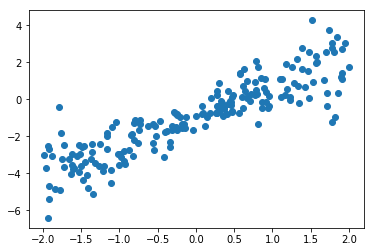

In [30]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [31]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [32]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 2ms/sample - loss: 3.0481 - val_loss: 1.9407
Epoch 2/300
105/105 [==============================] - 0s 62us/sample - loss: 2.6222 - val_loss: 1.7385
Epoch 3/300
105/105 [==============================] - 0s 51us/sample - loss: 2.2752 - val_loss: 1.5711
Epoch 4/300
105/105 [==============================] - 0s 52us/sample - loss: 1.9859 - val_loss: 1.4330
Epoch 5/300
105/105 [==============================] - 0s 49us/sample - loss: 1.7505 - val_loss: 1.3240
Epoch 6/300
105/105 [==============================] - 0s 52us/sample - loss: 1.5597 - val_loss: 1.2430
Epoch 7/300
105/105 [==============================] - 0s 55us/sample - loss: 1.4246 - val_loss: 1.1779
Epoch 8/300
105/105 [==============================] - 0s 47us/sample - loss: 1.3066 - val_loss: 1.1205
Epoch 9/300
105/105 [==============================] - 0s 51us/sample - loss: 1.2076 - val_loss: 1.0744
Epoch 10/300
105/105

105/105 [==============================] - 0s 53us/sample - loss: 0.7556 - val_loss: 0.9092
Epoch 79/300
105/105 [==============================] - 0s 48us/sample - loss: 0.7564 - val_loss: 0.9093
Epoch 80/300
105/105 [==============================] - 0s 50us/sample - loss: 0.7582 - val_loss: 0.9083
Epoch 81/300
105/105 [==============================] - 0s 49us/sample - loss: 0.7562 - val_loss: 0.9077
Epoch 82/300
105/105 [==============================] - 0s 46us/sample - loss: 0.7563 - val_loss: 0.9087
Epoch 83/300
105/105 [==============================] - 0s 53us/sample - loss: 0.7565 - val_loss: 0.9101
Epoch 84/300
105/105 [==============================] - 0s 48us/sample - loss: 0.7569 - val_loss: 0.9106
Epoch 85/300
105/105 [==============================] - 0s 57us/sample - loss: 0.7565 - val_loss: 0.9067
Epoch 86/300
105/105 [==============================] - 0s 47us/sample - loss: 0.7558 - val_loss: 0.9066
Epoch 87/300
105/105 [==============================] - 0s 46us/samp

105/105 [==============================] - 0s 46us/sample - loss: 0.7559 - val_loss: 0.9004
Epoch 156/300
105/105 [==============================] - 0s 58us/sample - loss: 0.7560 - val_loss: 0.8999
Epoch 157/300
105/105 [==============================] - 0s 55us/sample - loss: 0.7566 - val_loss: 0.8999
Epoch 158/300
105/105 [==============================] - 0s 51us/sample - loss: 0.7561 - val_loss: 0.9007
Epoch 159/300
105/105 [==============================] - 0s 50us/sample - loss: 0.7566 - val_loss: 0.8994
Epoch 160/300
105/105 [==============================] - 0s 53us/sample - loss: 0.7561 - val_loss: 0.8960
Epoch 161/300
105/105 [==============================] - 0s 46us/sample - loss: 0.7567 - val_loss: 0.8995
Epoch 162/300
105/105 [==============================] - 0s 56us/sample - loss: 0.7582 - val_loss: 0.9010
Epoch 163/300
105/105 [==============================] - 0s 46us/sample - loss: 0.7571 - val_loss: 0.8996
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 59us/sample - loss: 0.7581 - val_loss: 0.8933
Epoch 233/300
105/105 [==============================] - 0s 48us/sample - loss: 0.7567 - val_loss: 0.8925
Epoch 234/300
105/105 [==============================] - 0s 58us/sample - loss: 0.7586 - val_loss: 0.8988
Epoch 235/300
105/105 [==============================] - 0s 59us/sample - loss: 0.7560 - val_loss: 0.8980
Epoch 236/300
105/105 [==============================] - 0s 55us/sample - loss: 0.7566 - val_loss: 0.8971
Epoch 237/300
105/105 [==============================] - 0s 46us/sample - loss: 0.7571 - val_loss: 0.8979
Epoch 238/300
105/105 [==============================] - 0s 49us/sample - loss: 0.7571 - val_loss: 0.9019
Epoch 239/300
105/105 [==============================] - 0s 47us/sample - loss: 0.7562 - val_loss: 0.9040
Epoch 240/300
105/105 [==============================] - 0s 49us/sample - loss: 0.7568 - val_loss: 0.9043
Epoch 241/300
105/105 [==============================] - 0s 

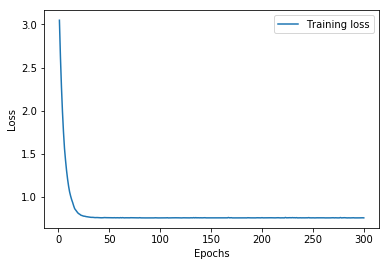

In [35]:
epochs = np.arange(1, 300+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 함수형 API

In [36]:
input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 590us/sample - loss: 10.7101 - val_loss: 6.4314
Epoch 2/300
105/105 [==============================] - 0s 52us/sample - loss: 8.7783 - val_loss: 5.4318
Epoch 3/300
105/105 [==============================] - 0s 54us/sample - loss: 7.2606 - val_loss: 4.5541
Epoch 4/300
105/105 [==============================] - 0s 49us/sample - loss: 5.9468 - val_loss: 3.8117
Epoch 5/300
105/105 [==============================] - 0s 63us/sample - loss: 4.8472 - val_loss: 3.2592
Epoch 6/300
105/105 [==============================] - 0s 48us/sample - loss: 4.0369 - val_loss: 2.8379
Epoch 7/300
105/105 [==============================] - 0s 50us/sample - loss: 3.4245 - val_loss: 2.4688
Epoch 8/300
105/105 [==============================] - 0s 67us/sample - loss: 2.8732 - val_loss: 2.1686
Epoch 9/300
105/105 [==============================] - 0s 63us/sample - loss: 2.4594 - val_loss: 1.9129
Epoch 10/300
105/

105/105 [==============================] - 0s 49us/sample - loss: 0.7567 - val_loss: 0.8991
Epoch 79/300
105/105 [==============================] - 0s 68us/sample - loss: 0.7568 - val_loss: 0.8987
Epoch 80/300
105/105 [==============================] - 0s 47us/sample - loss: 0.7568 - val_loss: 0.9016
Epoch 81/300
105/105 [==============================] - 0s 58us/sample - loss: 0.7569 - val_loss: 0.8988
Epoch 82/300
105/105 [==============================] - 0s 56us/sample - loss: 0.7567 - val_loss: 0.9033
Epoch 83/300
105/105 [==============================] - 0s 47us/sample - loss: 0.7573 - val_loss: 0.9020
Epoch 84/300
105/105 [==============================] - 0s 57us/sample - loss: 0.7579 - val_loss: 0.9023
Epoch 85/300
105/105 [==============================] - 0s 46us/sample - loss: 0.7567 - val_loss: 0.9060
Epoch 86/300
105/105 [==============================] - 0s 45us/sample - loss: 0.7558 - val_loss: 0.9066
Epoch 87/300
105/105 [==============================] - 0s 63us/samp

105/105 [==============================] - 0s 58us/sample - loss: 0.7566 - val_loss: 0.9004
Epoch 156/300
105/105 [==============================] - 0s 50us/sample - loss: 0.7564 - val_loss: 0.9071
Epoch 157/300
105/105 [==============================] - 0s 51us/sample - loss: 0.7570 - val_loss: 0.9090
Epoch 158/300
105/105 [==============================] - 0s 53us/sample - loss: 0.7569 - val_loss: 0.9098
Epoch 159/300
105/105 [==============================] - 0s 48us/sample - loss: 0.7575 - val_loss: 0.9085
Epoch 160/300
105/105 [==============================] - 0s 63us/sample - loss: 0.7566 - val_loss: 0.9089
Epoch 161/300
105/105 [==============================] - 0s 48us/sample - loss: 0.7565 - val_loss: 0.9080
Epoch 162/300
105/105 [==============================] - 0s 58us/sample - loss: 0.7564 - val_loss: 0.9041
Epoch 163/300
105/105 [==============================] - 0s 63us/sample - loss: 0.7567 - val_loss: 0.9028
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 61us/sample - loss: 0.7563 - val_loss: 0.9052
Epoch 233/300
105/105 [==============================] - 0s 48us/sample - loss: 0.7564 - val_loss: 0.9050
Epoch 234/300
105/105 [==============================] - 0s 74us/sample - loss: 0.7565 - val_loss: 0.9014
Epoch 235/300
105/105 [==============================] - 0s 57us/sample - loss: 0.7575 - val_loss: 0.9022
Epoch 236/300
105/105 [==============================] - 0s 65us/sample - loss: 0.7561 - val_loss: 0.9029
Epoch 237/300
105/105 [==============================] - 0s 62us/sample - loss: 0.7568 - val_loss: 0.9089
Epoch 238/300
105/105 [==============================] - 0s 65us/sample - loss: 0.7560 - val_loss: 0.9088
Epoch 239/300
105/105 [==============================] - 0s 49us/sample - loss: 0.7573 - val_loss: 0.9084
Epoch 240/300
105/105 [==============================] - 0s 54us/sample - loss: 0.7563 - val_loss: 0.9079
Epoch 241/300
105/105 [==============================] - 0s 

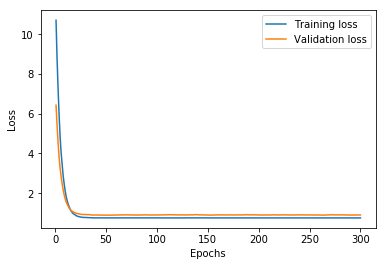

In [38]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## tf.keras 모델의 저장과 복원

In [39]:
model.save_weights('simple_weights.h5')

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_weights.h5')

In [41]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 285us/sample - loss: 0.9477


0.9476535701751709

In [42]:
model.save('simple_model.h5')

In [43]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 289us/sample - loss: 0.9477


0.9476535701751709

In [44]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 494us/sample - loss: 5.3103 - val_loss: 2.7569
Epoch 2/300
120/120 [==============================] - 0s 85us/sample - loss: 4.4863 - val_loss: 2.3323
Epoch 3/300
120/120 [==============================] - 0s 83us/sample - loss: 3.8006 - val_loss: 1.9843
Epoch 4/300
120/120 [==============================] - 0s 84us/sample - loss: 3.2374 - val_loss: 1.7178
Epoch 5/300
120/120 [==============================] - 0s 74us/sample - loss: 2.7889 - val_loss: 1.5081
Epoch 6/300
120/120 [==============================] - 0s 78us/sample - loss: 2.4281 - val_loss: 1.3375
Epoch 7/300
120/120 [==============================] - 0s 86us/sample - loss: 2.1258 - val_loss: 1.2057
Epoch 8/300
120/120 [==============================] - 0s 74us/sample - loss: 1.8830 - val_loss: 1.0993
Epoch 9/300
120/120 [==============================] - 0s 86us/sample - loss: 1.6837 - val_loss: 1.0179
Epoch 10/300
120/1

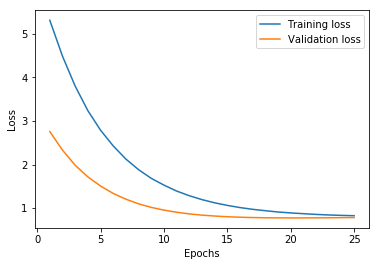

In [45]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

저장된 모델 복원:

In [46]:
model = tf.keras.models.load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 299us/sample - loss: 1.0095


1.0095115447044372

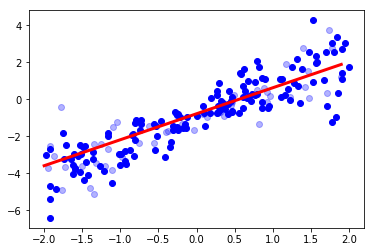

In [47]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()

## 계산 그래프 시각화하기

In [48]:
tf.keras.backend.clear_session()

In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [50]:
callback_list = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 604us/sample - loss: 7.0988 - val_loss: 4.2865
Epoch 2/300
105/105 [==============================] - 0s 76us/sample - loss: 5.8967 - val_loss: 3.6560
Epoch 3/300
105/105 [==============================] - 0s 74us/sample - loss: 4.9315 - val_loss: 3.1784
Epoch 4/300
105/105 [==============================] - 0s 68us/sample - loss: 4.1848 - val_loss: 2.7517
Epoch 5/300
105/105 [==============================] - 0s 51us/sample - loss: 3.5381 - val_loss: 2.3732
Epoch 6/300
105/105 [==============================] - 0s 53us/sample - loss: 2.9628 - val_loss: 2.1046
Epoch 7/300
105/105 [==============================] - 0s 56us/sample - loss: 2.5470 - val_loss: 1.8681
Epoch 8/300
105/105 [==============================] - 0s 60us/sample - loss: 2.1993 - val_loss: 1.6920
Epoch 9/300
105/105 [==============================] - 0s 62us/sample - loss: 1.9234 - val_loss: 1.5234
Epoch 10/300
105/1

105/105 [==============================] - 0s 61us/sample - loss: 0.7563 - val_loss: 0.9152
Epoch 79/300
105/105 [==============================] - 0s 55us/sample - loss: 0.7578 - val_loss: 0.9140
Epoch 80/300
105/105 [==============================] - 0s 63us/sample - loss: 0.7562 - val_loss: 0.9145
Epoch 81/300
105/105 [==============================] - 0s 53us/sample - loss: 0.7567 - val_loss: 0.9121
Epoch 82/300
105/105 [==============================] - 0s 74us/sample - loss: 0.7561 - val_loss: 0.9108
Epoch 83/300
105/105 [==============================] - 0s 59us/sample - loss: 0.7560 - val_loss: 0.9104
Epoch 84/300
105/105 [==============================] - 0s 63us/sample - loss: 0.7568 - val_loss: 0.9109
Epoch 85/300
105/105 [==============================] - 0s 51us/sample - loss: 0.7568 - val_loss: 0.9124
Epoch 86/300
105/105 [==============================] - 0s 78us/sample - loss: 0.7565 - val_loss: 0.9119
Epoch 87/300
105/105 [==============================] - 0s 69us/samp

105/105 [==============================] - 0s 67us/sample - loss: 0.7578 - val_loss: 0.9094
Epoch 156/300
105/105 [==============================] - 0s 66us/sample - loss: 0.7564 - val_loss: 0.9155
Epoch 157/300
105/105 [==============================] - 0s 53us/sample - loss: 0.7561 - val_loss: 0.9123
Epoch 158/300
105/105 [==============================] - 0s 52us/sample - loss: 0.7579 - val_loss: 0.9208
Epoch 159/300
105/105 [==============================] - 0s 67us/sample - loss: 0.7579 - val_loss: 0.9237
Epoch 160/300
105/105 [==============================] - 0s 71us/sample - loss: 0.7585 - val_loss: 0.9254
Epoch 161/300
105/105 [==============================] - 0s 65us/sample - loss: 0.7574 - val_loss: 0.9242
Epoch 162/300
105/105 [==============================] - 0s 60us/sample - loss: 0.7584 - val_loss: 0.9239
Epoch 163/300
105/105 [==============================] - 0s 67us/sample - loss: 0.7576 - val_loss: 0.9196
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 63us/sample - loss: 0.7570 - val_loss: 0.9098
Epoch 233/300
105/105 [==============================] - 0s 51us/sample - loss: 0.7564 - val_loss: 0.9115
Epoch 234/300
105/105 [==============================] - 0s 66us/sample - loss: 0.7562 - val_loss: 0.9100
Epoch 235/300
105/105 [==============================] - 0s 81us/sample - loss: 0.7568 - val_loss: 0.9089
Epoch 236/300
105/105 [==============================] - 0s 51us/sample - loss: 0.7569 - val_loss: 0.9090
Epoch 237/300
105/105 [==============================] - 0s 51us/sample - loss: 0.7591 - val_loss: 0.9085
Epoch 238/300
105/105 [==============================] - 0s 66us/sample - loss: 0.7574 - val_loss: 0.9063
Epoch 239/300
105/105 [==============================] - 0s 61us/sample - loss: 0.7562 - val_loss: 0.9102
Epoch 240/300
105/105 [==============================] - 0s 52us/sample - loss: 0.7564 - val_loss: 0.9096
Epoch 241/300
105/105 [==============================] - 0s 

코랩을 사용하거나 주피터 노트북을 로컬 컴퓨터에서 실행하는 경우엔 아래 두 개의 코드 셀의 주석을 삭제하고 실행하면 텐서보드를 노트북에 임베딩시킬 수 있습니다.

In [51]:
# %load_ext tensorboard.notebook

In [52]:
# %tensorboard --logdir logs --port 6006

<img src="tensorboard-1.png">

<img src="tensorboard-2.png">

In [53]:
input = tf.keras.Input(shape=(784,))
hidden = tf.keras.layers.Dense(100)(input)
output = tf.keras.layers.Dense(10)(hidden)

model = tf.keras.Model(input, output)

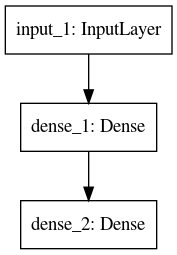

In [54]:
tf.keras.utils.plot_model(model, to_file='model_1.png')

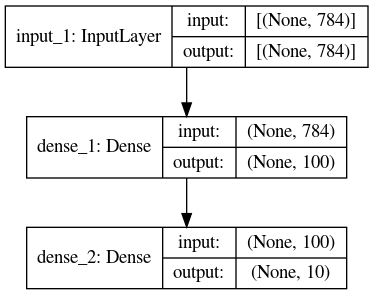

In [55]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_2.png')